In [1]:
import gymnasium as gym
import ray
import matplotlib.pyplot as plt
from ray.rllib.algorithms.ppo import PPOConfig

2025-05-11 13:06:18,065	WARNING deprecation.py:50 -- DeprecationWarning: `DirectStepOptimizer` has been deprecated. This will raise an error in the future!


In [2]:
# Initialize Ray
ray.init(ignore_reinit_error=True)

2025-05-11 13:06:26,263	INFO worker.py:1621 -- Started a local Ray instance.


Python version:,3.10.16
Ray version:,2.6.3


In [3]:
# PPO Configuration
config = (
    PPOConfig()
    .environment(env="ALE/Pong-ram-v5")  # Atari RAM environment
    .framework("torch")
    .resources(num_gpus=0)  # Set to 1 if using CUDA
    .rollouts(num_rollout_workers=0)  # Use >0 if not on notebook
    .training(
        gamma=0.99,
        lr=5e-5,  # Often smaller for PPO
        train_batch_size=4000,
        sgd_minibatch_size=128,
        num_sgd_iter=10,
        model={"fcnet_hiddens": [256], "fcnet_activation": "relu"},
    )
    .debugging(log_level="WARN")
)

2025-05-11 13:08:20,898	WARNING algorithm_config.py:2558 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.


In [4]:
from ray.rllib.algorithms.ppo import PPO

# Build PPO trainer
algo = config.build()
avg_rewards = []

# Training Loop
for episode in range(100):  
    result = algo.train()
    reward = result["episode_reward_mean"]
    print(f"PPO Episode {episode} - Avg Reward: {reward:.2f}")
    avg_rewards.append(reward)

2025-05-11 13:08:22,631	WARNING algorithm_config.py:2558 -- Setting `exploration_config={}` because you set `_enable_rl_module_api=True`. When RLModule API are enabled, exploration_config can not be set. If you want to implement custom exploration behaviour, please modify the `forward_exploration` method of the RLModule at hand. On configs that have a default exploration config, this must be done with `config.exploration_config={}`.
C:\Users\elias\anaconda3\envs\rllib-atari\lib\site-packages\ray\rllib\algorithms\algorithm.py:484: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases. You could suppress this warning by setting env variable PYTHONWARNINGS="ignore::DeprecationWarning"
`UnifiedLogger` will be removed in Ray 2.7.
  return UnifiedLogger(config, logdir, loggers=None)
C:\Users\elias\anaconda3\envs\rllib-atari\lib\site-packages\ray\tune\logger\unified.py:53: RayDeprecationWarning: This API is deprecated and may be removed in future Ray releases

PPO Episode 0 - Avg Reward: -20.00
PPO Episode 1 - Avg Reward: -20.12
PPO Episode 2 - Avg Reward: -20.25
PPO Episode 3 - Avg Reward: -20.18
PPO Episode 4 - Avg Reward: -20.05
PPO Episode 5 - Avg Reward: -20.16
PPO Episode 6 - Avg Reward: -20.17
PPO Episode 7 - Avg Reward: -20.09
PPO Episode 8 - Avg Reward: -20.03
PPO Episode 9 - Avg Reward: -20.02
PPO Episode 10 - Avg Reward: -19.98
PPO Episode 11 - Avg Reward: -19.96
PPO Episode 12 - Avg Reward: -19.94
PPO Episode 13 - Avg Reward: -19.94
PPO Episode 14 - Avg Reward: -19.91
PPO Episode 15 - Avg Reward: -19.92
PPO Episode 16 - Avg Reward: -19.86
PPO Episode 17 - Avg Reward: -19.83
PPO Episode 18 - Avg Reward: -19.85
PPO Episode 19 - Avg Reward: -19.84
PPO Episode 20 - Avg Reward: -19.86
PPO Episode 21 - Avg Reward: -19.88
PPO Episode 22 - Avg Reward: -19.89
PPO Episode 23 - Avg Reward: -19.88
PPO Episode 24 - Avg Reward: -19.87
PPO Episode 25 - Avg Reward: -19.89
PPO Episode 26 - Avg Reward: -19.85
PPO Episode 27 - Avg Reward: -19.84
PP

### Plot the Learning Curve

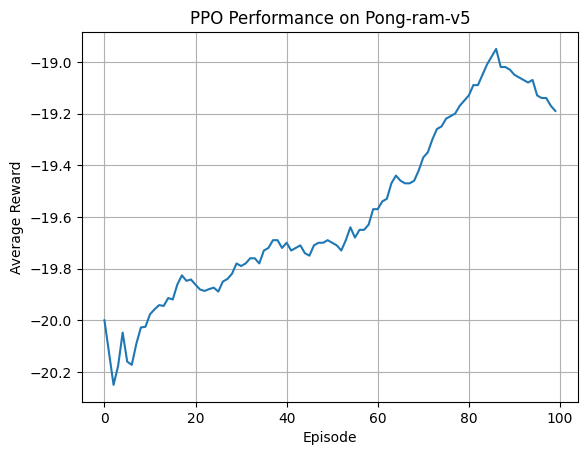

In [5]:
# Plotting
plt.plot(avg_rewards)
plt.xlabel("Episode")
plt.ylabel("Average Reward")
plt.title("PPO Performance on Pong-ram-v5")
plt.grid(True)
plt.show()